# 破缺PHS，边缘态的建立与消失

In [3]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

In [47]:
import numpy as np 
import matplotlib.pyplot as plt
 
def carry_k(state, theta, chi):
	'''
	carry U operatior on state
	suppose U=exp(-i*theta/2*sigmaz)
	'''
	U = np.array([[np.cos(theta/2)-1j*np.sin(theta/2)*np.sin(chi), -np.sin(theta/2)*np.cos(chi)],[np.sin(theta/2)*np.cos(chi), np.cos(theta/2)+1j*np.sin(theta/2)*np.sin(chi)]])
	final_state = np.dot(U, state)

	return final_state

def carry_y(state, theta):
	'''
	carry U operatior on state
	suppose U=exp(-i*theta/2*sigmay)
	'''
	U = np.array([[np.cos(theta/2), -np.sin(theta/2)],[np.sin(theta/2), np.cos(theta/2)]])
	final_state = np.dot(U, state)

	return final_state

def blue_carry(state, theta):
	'''
	blue carry U on state
	suppose U=exp(-i*theta/2*sigmay)
	and |0>-->|1>,phonon number plus 1
	|1>-->|0>, phonon number minus 1
	'''
	# U operator on up and down level of state
	state_up = np.vstack((state[0], np.zeros(len(state[0]))))
	state_down = np.vstack((np.zeros(len(state[0])), state[1]))
	U = np.array([[np.cos(theta/2), -np.sin(theta/2)], [np.sin(theta/2), np.cos(theta/2)]])
	carry_state_up = np.dot(U, state_up)
	carry_state_down = np.dot(U, state_down)
	# after U operation, down level minus 1
	up_state = carry_state_up[0]
	down_state_minus = carry_state_up[1]
	down_state_minus_0 = state_up[0][0]  # blue carry can not drive the phonon=0 && up level
	down_state_minus = np.delete(down_state_minus, 0)
	down_state_minus = np.insert(down_state_minus, len(down_state_minus)-1, 0)
	# after U operation, up level plus 1
	up_state_plus = carry_state_down[0]
	down_state = carry_state_down[1]
	up_state_plus = np.insert(up_state_plus, 0, down_state_minus_0)
	up_state_plus = np.delete(up_state_plus, len(up_state_plus)-1)
	# probability add up and down level
	up = up_state + up_state_plus
	down = down_state_minus + down_state
	final_state = np.vstack((up, down))

	return final_state

def red_carry(state, theta):
	'''
	red carry U on state
	suppose U=exp(-i*theta/2*sigmay)
	and |0>-->|1>,phonon number minus 1
	|1>-->|0>, phonon number plus 1
	'''
	# U operator on up and down level of state
	state_up = np.vstack((state[0], np.zeros(len(state[0]))))
	state_down = np.vstack((np.zeros(len(state[0])), state[1]))
	U = np.array([[np.cos(theta/2), -np.sin(theta/2)],[np.sin(theta/2), np.cos(theta/2)]])
	carry_state_up = np.dot(U, state_up)
	carry_state_down = np.dot(U, state_down)
	# after U operation, up level minus 1
	up_state_minus = carry_state_down[0]
	down_state = carry_state_down[1]
	up_state_minus_0 = state_down[1][0] # red carry can not drive the phonon=0 && down level
	up_state_minus = np.delete(up_state_minus,0)
	up_state_minus = np.insert(up_state_minus,len(up_state_minus)-1,0)
	# after U operation, down level plus 1
	up_state = carry_state_up[0]
	down_state_plus = carry_state_up[1]
	down_state_plus = np.insert(down_state_plus,0,up_state_minus_0)
	down_state_plus = np.delete(down_state_plus,len(down_state_plus)-1)
	# probability add up and down level
	up = up_state + up_state_minus
	down = down_state_plus + down_state
	final_state = np.vstack((up, down))

	return final_state

def Operator(up_state, down_state, func, theta):
	'''
	operator include carry, blue and red
	'''
	state = np.vstack((up_state, down_state))
	state = func(state, theta)

	return state[0], state[1]

def Operator_k(up_state, down_state, theta, chi):
	'''
	operator include carry, blue and red
	'''
	state = np.vstack((up_state, down_state))
	state = carry_k(state, theta, chi)

	return state[0], state[1]

def one_step_2_y(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	T1R1T2R2
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry_y, theta_2)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry_y, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry_y, theta_1)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry_y, np.pi)

	state = np.vstack((up_state, down_state, aux_state))
	return state

def N_step_2_y(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_2_y(state, theta_1, theta_2)
	return state
    
def one_step_2_K(state, theta_1, theta_2, chi):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	T1R1T2R2
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator_k(up_state, down_state, theta_2, chi)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry_y, np.pi)
	aux_state, down_state = Operator_k(aux_state, down_state, theta_1, chi)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry_y, np.pi)

	state = np.vstack((up_state, down_state, aux_state))
	return state

def N_step_2_K(state, theta_1, theta_2, chi, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_2_K(state, theta_1, theta_2, chi)
	return state

def one_step_2_k(state, theta_1, theta_2, chi):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	T1R1T2R2
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, theta_2)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry_y, np.pi)
	aux_state, down_state = Operator_k(aux_state, down_state, theta_1, chi)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry_y, np.pi)

	state = np.vstack((up_state, down_state, aux_state))
	return state

def N_step_2_k(state, theta_1, theta_2, chi, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_2_k(state, theta_1, theta_2, chi)
	return state

In [23]:
def N_step_found(state, theta_1, theta_2, chi, N_1, N_2):
    for i in range(N_1):
        state = one_step_2_y(state, theta_1, theta_2)
    state_1 = state
    for i in range(N_2):
        state_1 = one_step_2_K(state_1, theta_1, theta_2, chi)
    return state_1

def N_step_destruc(state, theta_1, theta_2, chi, N_1, N_2):
    for i in range(N_1):
        state = one_step_2_K(state, theta_1, theta_2, chi)
    state_1 = state
    for i in range(N_2):
        state_1 = one_step_2_y(state_1, theta_1, theta_2)
    return state_1

In [48]:
def N_step_F(state, theta_1, theta_2, chi, N_1, N_2):
    for i in range(N_1):
        state = one_step_2_y(state, theta_1, theta_2)
    state_1 = state
    for i in range(N_2):
        state_1 = one_step_2_k(state_1, theta_1, theta_2, chi)
    return state_1

def N_step_D(state, theta_1, theta_2, chi, N_1, N_2):
    for i in range(N_1):
        state = one_step_2_k(state, theta_1, theta_2, chi)
    state_1 = state
    for i in range(N_2):
        state_1 = one_step_2_y(state_1, theta_1, theta_2)
    return state_1

In [81]:
M = 150
n = 1
N = 100
p1_y = np.zeros(101)
p2_y = np.zeros(101)
p3_y = np.zeros(101)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
chi = np.pi/2
# up_state[1] = 1/np.sqrt(2)
# down_state[0] = -1j/np.sqrt(2)
down_state[0] = 1
theta_2 = np.linspace(-2*np.pi,2*np.pi,101)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state1 = N_step_found(init_state, theta, theta_1, chi, N_1=10, N_2=20)
    state2 = N_step_destruc(init_state, theta, theta_1, chi, N_1=10, N_2=20)
    state3 = N_step_2_y(init_state, theta, theta_1, N=30)
    P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
    P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
    P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
    p1_y[i] = P1[0] + P1[1] 
    p2_y[i] = P2[0] + P2[1] 
    p3_y[i] = P3[0] + P3[1]

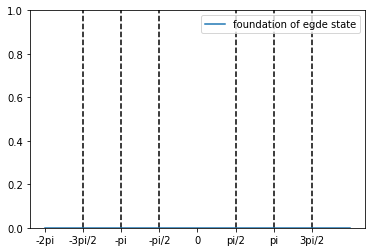

In [59]:
plt.plot(theta_2, p1_y, label='foundation of egde state')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

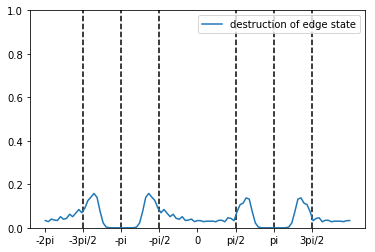

In [82]:
plt.plot(theta_2, p2_y, label='destruction of edge state')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

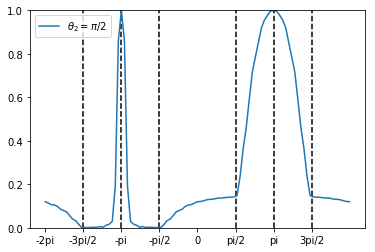

In [44]:
plt.plot(theta_2, p3_y, label='$ \\theta_2 = \pi/2$')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 